# The Diabetes Data Set

We're working in this notebook on a model that can estimate a numerical value out of numerical features. We'll be first starting with a simple example to understand what regression is about, then getting into the practical case using the `diabetes`.

## Dummy example

In [37]:
import numpy as np
from matplotlib import pyplot as plt

In [38]:
size = 1000
X = 10*np.random.rand(size, 1)
y = 6 + 3*X + np.random.randn(size, 1) + X*np.cos(3*X)

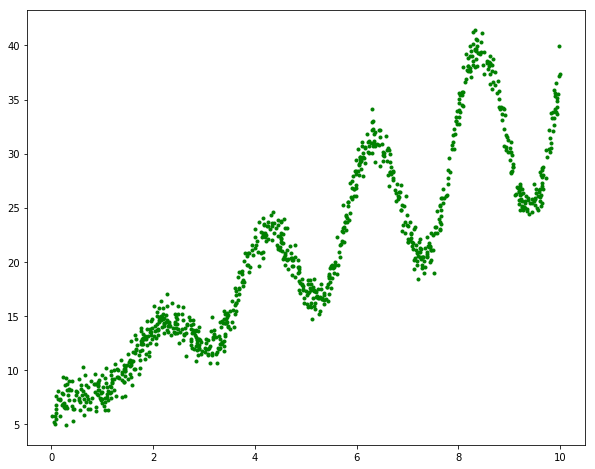

In [39]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, y, 'g.')

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
lin_reg = LinearRegression()

In [44]:
LinearRegression?

In [45]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
lin_reg.predict(2)

array([[12.21229738]])

There is nothing much behind the prediction for this simple model. It's only about multiplying the input by the linear coefficient and adding the intercept to it. 

In [47]:
lin_reg.coef_, lin_reg.intercept_

(array([[2.73797037]]), array([6.73635664]))

In [48]:
lin_reg.coef_*2 + lin_reg.intercept_

array([[12.21229738]])

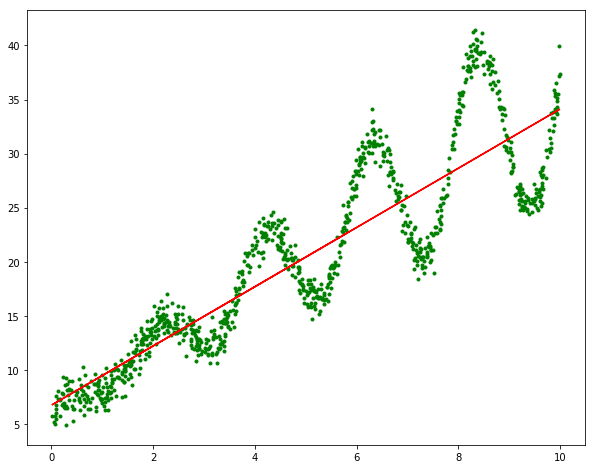

In [49]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, y, 'g.')
ax.plot(X, lin_reg.predict(X), 'r-')

### Evaluation

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
mean_squared_error?

In [52]:
mean_squared_error(y_test, lin_reg.predict(X_test))

17.165832406777476

In [53]:
def learning_curve(model, X, y, X_test, y_test, metric, min_index=0):
    max_index = X.shape[0]
    indexes = np.arange(min_index, max_index)
    scores_train, scores_test = [], []
    for i in range(min_index, max_index):
        X_i, y_i = X[:i], y[:i]
        model.fit(X_i, y_i)
        scores_train.append(metric(model.predict(X_i), y_i))
        scores_test.append(metric(model.predict(X_test), y_test))
    return indexes, scores_train, scores_test

In [54]:
inds, sc, sc_t = learning_curve(lin_reg, X_train, y_train, 
                                X_test, y_test, mean_squared_error, 10)

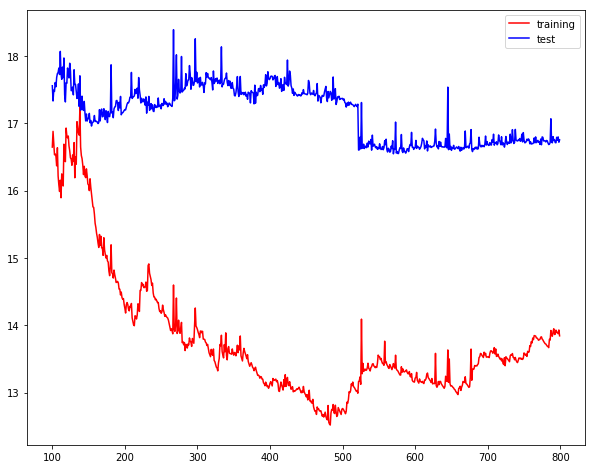

In [70]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(inds, sc, "r-", label="training")
ax.plot(inds, sc_t, "b-", label="test")
ax.legend()

### A Human Readable Score

The mean squared error is not always interpretable, it is mainly essential for the mathematical engine in the backend to build up the learning process (updating the model's parameters). A better fitted metric would be to look into success and failure of estimation up to a given accepted error. 

In [83]:
tols = np.linspace(0, 10, 20)
scores = []
for tol in tols:
    successes = np.logical_and(lin_reg.predict(X_test) <= y_test + tol, 
                               lin_reg.predict(X_test) >= y_test - tol)
    scores.append(np.sum(successes)/y_test.shape[0])

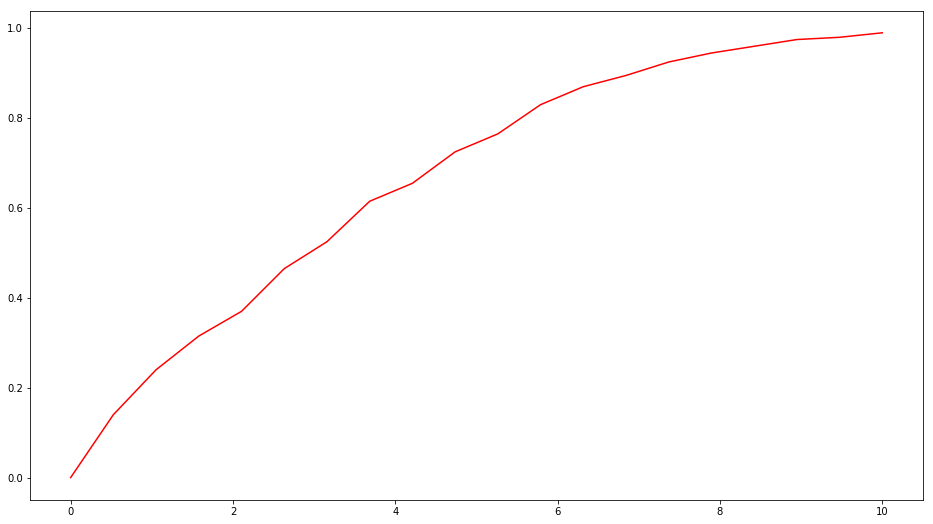

In [85]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(tols, scores, 'r-')

### Polynomial Regression

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [57]:
PolynomialFeatures?

In [89]:
p_deg = PolynomialFeatures(11)

In [90]:
t = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
t = p_deg.fit_transform(t)

In [91]:
t.shape

(5, 12)

In [92]:
p_deg.fit(X_train)
X_d_train = p_deg.transform(X_train)
X_d_test = p_deg.transform(X_test)
X_d_train.shape, X_d_test.shape

((800, 12), (200, 12))

In [93]:
poly_reg_d = LinearRegression()

In [94]:
LinearRegression?

In [95]:
poly_reg_d.fit(X_d_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
poly_reg_d.coef_, poly_reg_d.intercept_

(array([[ 0.00000000e+00, -2.04194466e+01,  5.85658641e+01,
         -7.25350283e+01,  5.09831010e+01, -2.16453908e+01,
          5.73591478e+00, -9.59094884e-01,  9.97764931e-02,
         -6.13657872e-03,  1.97144948e-04, -2.35857745e-06]]),
 array([9.0481559]))

In [97]:
mean_squared_error(y_test, poly_reg_d.predict(X_d_test))

11.624134384701636

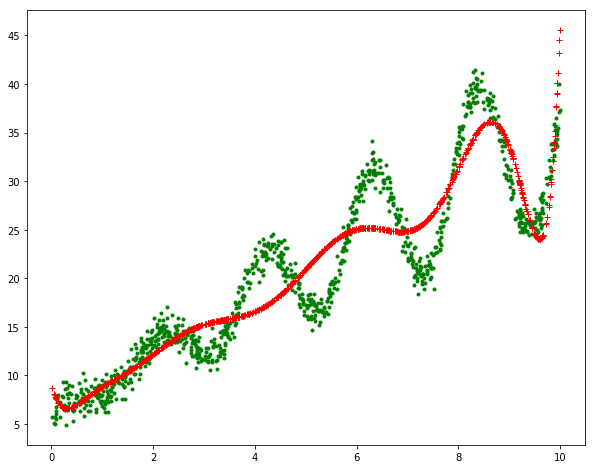

In [98]:
X_d = p_deg.fit_transform(X)
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(X, y, 'g.')
ax.plot(X, poly_reg_d.predict(X_d), 'r+')

In [99]:
inds, sc, sc_t = learning_curve(poly_reg_d, X_d_train, y_train, 
                                X_d_test, y_test, mean_squared_error, 100)

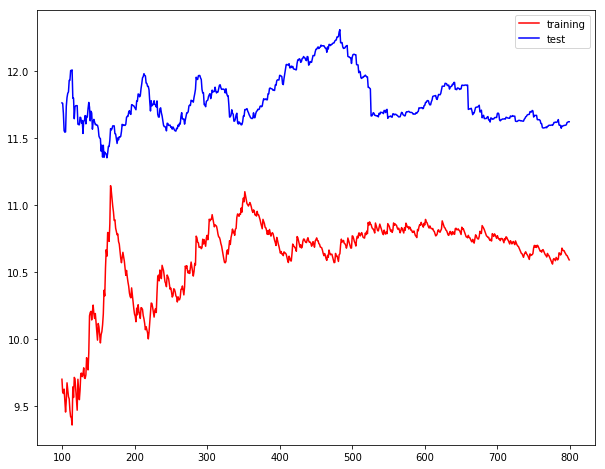

In [100]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(inds, sc, "r-", label="training")
ax.plot(inds, sc_t, "b-", label="test")
ax.legend()

In [101]:
tols = np.linspace(0, 10, 20)
scores = []
for tol in tols:
    successes = np.logical_and(poly_reg_d.predict(X_d_test) <= y_test + tol, 
                               poly_reg_d.predict(X_d_test) >= y_test - tol)
    scores.append(np.sum(successes)/y_test.shape[0])

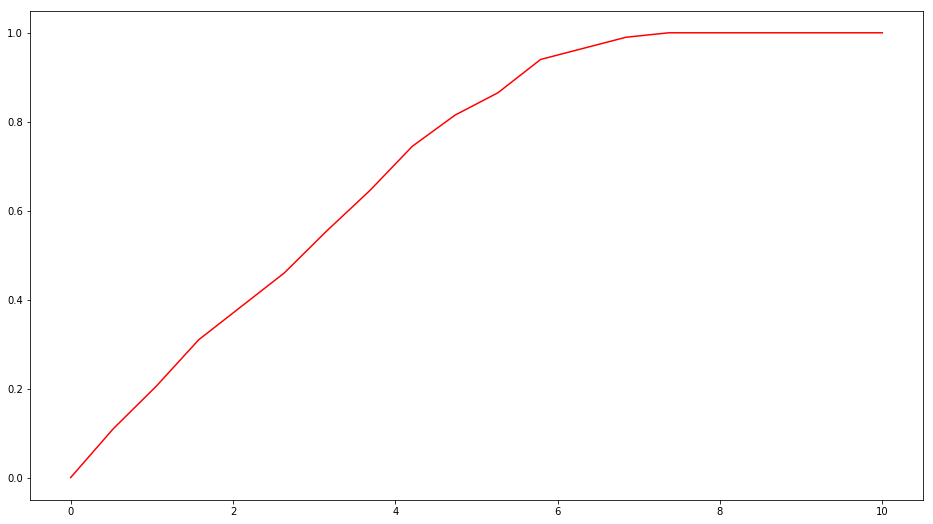

In [103]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(tols, scores, 'r-')

### Choosing the Best Polynomial Regression

This is mainly about choosing the polynomial that gives us the best training score / test score trade-off. 

In [114]:
degrees = np.arange(1, 31)
tol = 3
poly_models = []
scores_train, scores_test = [], []
for degree in degrees:
    ## Fitting model for degree d polynomial regression
    poly_f = PolynomialFeatures(degree)
    poly_f.fit(X_train)
    X_d_train, X_d_test = poly_f.transform(X_train), poly_f.transform(X_test) 
    poly_model = LinearRegression()
    poly_model.fit(X_d_train, y_train)
    poly_models.append(poly_model)
    ## Computing score of model
    predict_training, predict_test = poly_model.predict(X_d_train), poly_model.predict(X_d_test)
    success_train = np.logical_and(predict_training <= y_train + tol,
                                   predict_training >= y_train - tol) 
    success_test =  np.logical_and(predict_test <= y_test + tol,
                                   predict_test >= y_test - tol) 
    score_train = np.sum(success_train)/y_train.shape[0]
    score_test = np.sum(success_test)/y_test.shape[0]
    scores_train.append(score_train)
    scores_test.append(score_test)

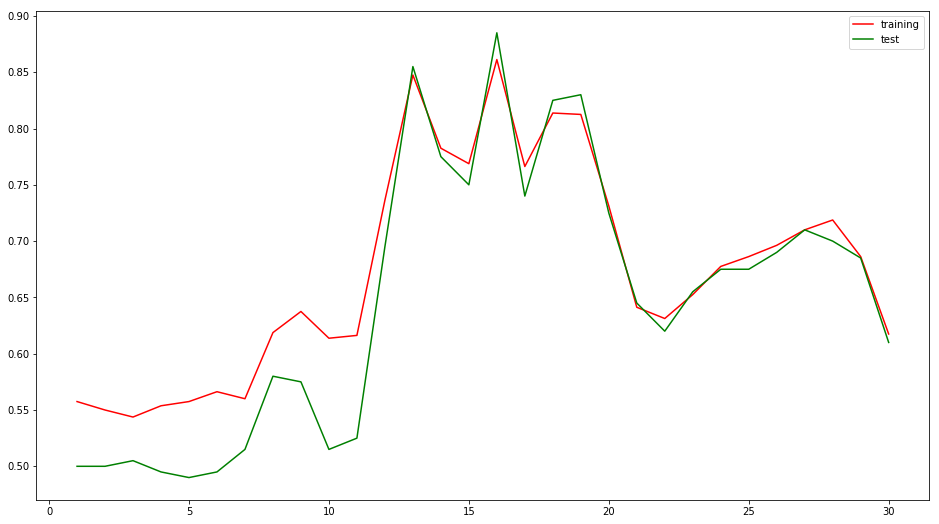

In [122]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(degrees.flatten(), scores_train, 'r-', label="training")
ax.plot(degrees.flatten(), scores_test, 'g-', label="test")
ax.legend()

## Taking Things Into Medical Data Sets

In [34]:
from sklearn import datasets

In [35]:
diabetes = datasets.load_diabetes()

In [36]:
print(diabetes.DESCR)

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani